In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv("/Users/shrey/Downloads/Cheapestelectriccars-EVDatabase.csv")

In [6]:
data.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,Pricei,Priceinindia
0,Opel Ampera-e,Battery Electric Vehicle | 58 kWh,7.3 sec,150 km/h,335 km,173 Wh/km,210 km/h,Front Wheel Drive,5,"€42,990",NaN
1,Renault Kangoo Maxi ZE 33,Battery Electric Vehicle | 31 kWh,22.4 sec,130 km/h,160 km,194 Wh/km,-,Front Wheel Drive,5,NaN,"£31,680"
2,Nissan Leaf,Battery Electric Vehicle | 36 kWh,7.9 sec,144 km/h,220 km,164 Wh/km,230 km/h,Front Wheel Drive,5,"€29,990","£25,995"
3,Audi e-tron Sportback 55 quattro,Battery Electric Vehicle | 86.5 kWh,5.7 sec,200 km/h,375 km,231 Wh/km,600 km/h,All Wheel Drive,5,NaN,"£79,900"
4,Porsche Taycan Turbo S,Battery Electric Vehicle | 83.7 kWh,2.8 sec,260 km/h,390 km,215 Wh/km,860 km/h,All Wheel Drive,4,"€186,336","£138,830"


In [8]:
#filling empty data with 0
data=data.fillna('0')

In [9]:
data['Manufacturer'] = data.Name.str.split(' ', 1, expand=True)[0]

In [11]:
#cleaning the data
#removing currency sign
Priceinindia=[]
for item in data['Priceinindia']:
    Priceinindia+=[int(item.replace('£','').replace(',',''))]
data['Priceinindia']=Priceinindia

In [13]:
Pricei=[]
for item in data['Pricei']:
    Pricei+=[int(item.replace('€','').replace(',',''))]
data['Pricei']=Pricei

In [16]:
FastChargeSpeed=[]
for item in data['FastChargeSpeed']:
    FastChargeSpeed+=[int(item.replace(' km/h','').replace('-','0'))]
data['FastChargeSpeed']=FastChargeSpeed

In [17]:
Efficiency=[]
for item in data['Efficiency']:
    Efficiency+=[int(item.replace(' Wh/km',''))]
data['Efficiency']=Efficiency

In [18]:
Range=[]
for item in data['Range']:
    Range+=[int(item.replace(' km',''))]
data['Range']=Range
TopSpeed=[]
for item in data['TopSpeed']:
    TopSpeed+=[int(item.replace(' km/h',''))]
data['TopSpeed']=TopSpeed
Acceleration=[]
for item in data['Acceleration']:
    Acceleration+=[float(item.replace(' sec',''))]
data['Acceleration']=Acceleration
Subtitle=[]
for item in data['Subtitle']:
    Subtitle+=[float(item.replace('Battery Electric Vehicle | ','').replace(' kWh','').replace('      ',''))]
data['Subtitle']=Subtitle

In [19]:
data.head()

,Name,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,Drive,NumberofSeats,Pricei,Priceinindia,Manufacturer
0,Opel Ampera-e,58.0,7.3,150,335,173,210,Front Wheel Drive,5,42990,0,Opel
1,Renault Kangoo Maxi ZE 33,31.0,22.4,130,160,194,0,Front Wheel Drive,5,0,31680,Renault
2,Nissan Leaf,36.0,7.9,144,220,164,230,Front Wheel Drive,5,29990,25995,Nissan
3,Audi e-tron Sportback 55 quattro,86.5,5.7,200,375,231,600,All Wheel Drive,5,0,79900,Audi
4,Porsche Taycan Turbo S,83.7,2.8,260,390,215,860,All Wheel Drive,4,186336,138830,Porsche


In [20]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   Subtitle         180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    object 
 8   NumberofSeats    180 non-null    int64  
 9   Pricei           180 non-null    int64  
 10  Priceinindia     180 non-null    int64  
 11  Manufacturer     180 non-null    object 
dtypes: float64(2), int64(7), object(3)
memory usage: 17.0+ KB


In [21]:
data.corr()

,Subtitle,Acceleration,TopSpeed,Range,Efficiency,FastChargeSpeed,NumberofSeats,Pricei,Priceinindia
Subtitle,1.000000,-0.622985,0.691415,0.890092,0.356426,0.659743,0.134447,0.598084,0.621253
Acceleration,-0.622985,1.000000,-0.821041,-0.712077,0.140984,-0.741670,0.318302,-0.501519,-0.674273
TopSpeed,0.691415,-0.821041,1.000000,0.760319,-0.047383,0.773190,-0.242567,0.678865,0.792669
Range,0.890092,-0.712077,0.760319,1.000000,-0.072273,0.767574,-0.068851,0.569037,0.620757
Efficiency,0.356426,0.140984,-0.047383,-0.072273,1.000000,-0.059914,0.602469,0.239221,0.084527
FastChargeSpeed,0.659743,-0.741670,0.773190,0.767574,-0.059914,1.000000,-0.119644,0.595609,0.650851
NumberofSeats,0.134447,0.318302,-0.242567,-0.068851,0.602469,-0.119644,1.000000,-0.012455,-0.211985
Pricei,0.598084,-0.501519,0.678865,0.569037,0.239221,0.595609,-0.012455,1.000000,0.698753
Priceinindia,0.621253,-0.674273,0.792669,0.620757,0.084527,0.650851,-0.211985,0.698753,1.000000


<AxesSubplot:>

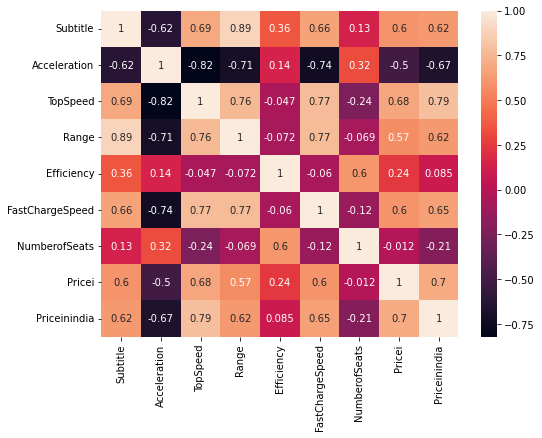

In [22]:
plt.figure(figsize=(8,6))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot:xlabel='Drive', ylabel='count'>

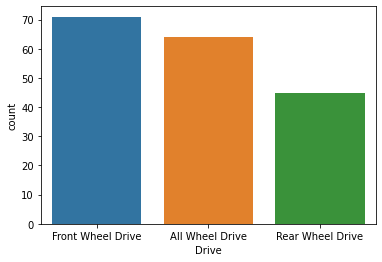

In [23]:
sns.countplot(x = 'Drive', data = data)

<AxesSubplot:xlabel='NumberofSeats', ylabel='count'>

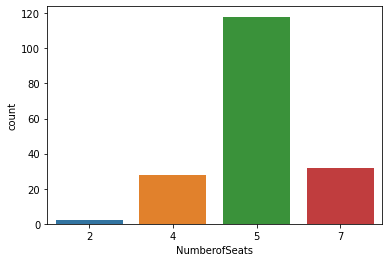

In [24]:
sns.countplot(x = 'NumberofSeats', data = data)

<AxesSubplot:xlabel='NumberofSeats', ylabel='count'>

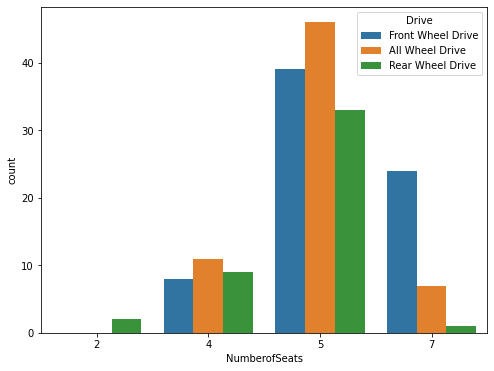

In [25]:
plt.figure(figsize=(8,6))
sns.countplot(x = 'NumberofSeats', hue='Drive', data=data)

<AxesSubplot:xlabel='count', ylabel='Manufacturer'>

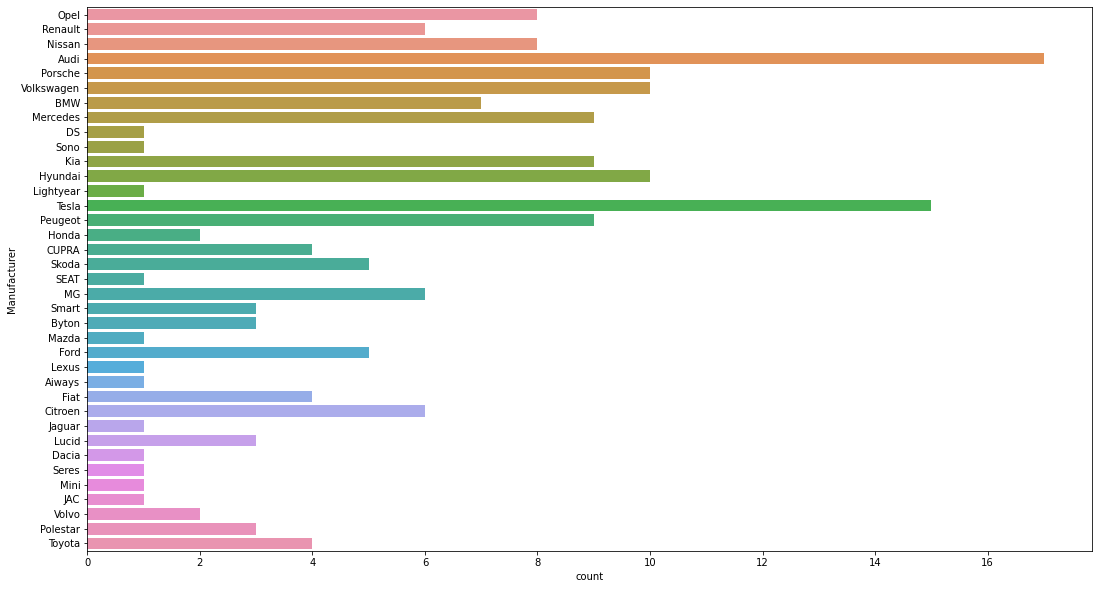

In [26]:
plt.figure(figsize=(18,10))
sns.countplot(y = 'Manufacturer', data = data)

SyntaxError: unexpected EOF while parsing (3377016960.py, line 1)

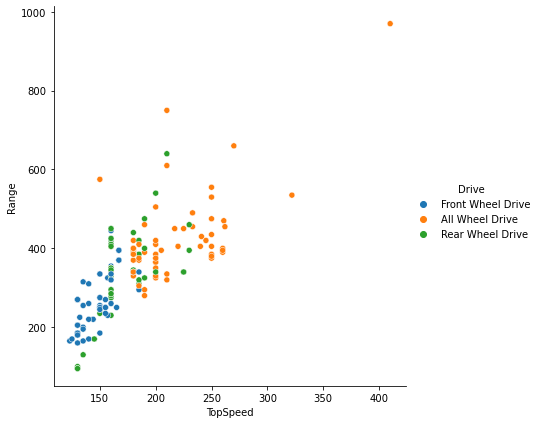

In [32]:
sns.relplot(x="TopSpeed", y="Range",height=6, hue="Drive",data=data)


In [35]:
sns.jointplot(x=data["KWH"], y=data["Range"], kind="hex", color="#4CB391")

KeyError: 'KWH'

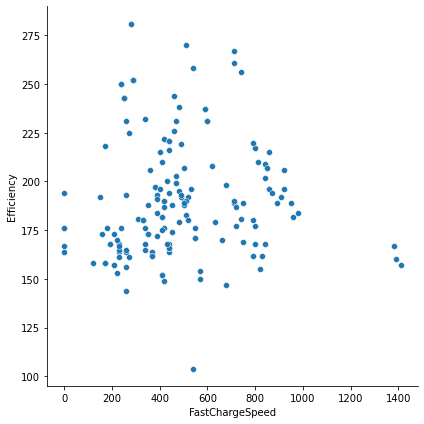

In [36]:
sns.relplot(x="FastChargeSpeed", y="Efficiency", height=6,data=data)

In [38]:
c=0
for i in range(0, len(data["Priceinindia"])):
    if (data["Priceinindia"][i]==0):
        c+=1
print('Empty Values:',c)

Empty Values: 44


In [39]:
for i in range(0, len(data["Priceinindia"])):
    if (data["Priceinindia"][i]==0):
        val=data["Pricei"][i]*0.85
        data["Priceinindia"][i]=val

C:\Users\shrey\AppData\Local\Temp\ipykernel_16208\894337202.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data["Priceinindia"][i]=val


In [43]:
pd.options.mode.chained_assignment = None

In [45]:
pip install category_encoders


Note: you may need to restart the kernel to use updated packages.


In [46]:
import category_encoders as ce
train_df=data
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Drive'],return_df=True,
                           mapping=[{'col':'Drive',
'mapping':{'Front Wheel Drive':1,'Rear Wheel Drive':2,'All Wheel Drive':3}}])
#fit and transform train data 
df_train = encoder.fit_transform(train_df)#Original data

In [48]:
import category_encoders as ce
train_df=data
# create object of Ordinalencoding
encoder= ce.OrdinalEncoder(cols=['Drive'],return_df=True,
                           mapping=[{'col':'Drive',
'mapping':{'Front Wheel Drive':1,'Rear Wheel Drive':2,'All Wheel Drive':3}}])
#fit and transform train data 
df_train = encoder.fit_transform(train_df)#Original data

In [49]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             180 non-null    object 
 1   Subtitle         180 non-null    float64
 2   Acceleration     180 non-null    float64
 3   TopSpeed         180 non-null    int64  
 4   Range            180 non-null    int64  
 5   Efficiency       180 non-null    int64  
 6   FastChargeSpeed  180 non-null    int64  
 7   Drive            180 non-null    int32  
 8   NumberofSeats    180 non-null    int64  
 9   Pricei           180 non-null    int64  
 10  Priceinindia     180 non-null    float64
 11  Manufacturer     180 non-null    object 
dtypes: float64(3), int32(1), int64(6), object(2)
memory usage: 16.3+ KB


In [51]:
X= df_train.drop(['Name', 'Pricei','Priceinindia','Manufacturer'], axis=1)
X=X.values

In [52]:
X

array([[ 58. ,   7.3, 150. , ..., 210. ,   1. ,   5. ],
       [ 31. ,  22.4, 130. , ...,   0. ,   1. ,   5. ],
       [ 36. ,   7.9, 144. , ..., 230. ,   1. ,   5. ],
       ...,
       [ 57. ,   7.7, 185. , ..., 340. ,   1. ,   5. ],
       [ 76.6,   6.9, 180. , ..., 470. ,   3. ,   5. ],
       [ 76.6,   8.5, 160. , ..., 520. ,   2. ,   5. ]])

In [53]:
y=df_train['Priceinindia'].values

In [54]:
X.shape

(180, 8)

In [55]:
y.shape

(180,)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=7)

In [57]:
from sklearn.ensemble import RandomForestRegressor
# create regressor object
regressor = RandomForestRegressor(n_estimators = 300, random_state = 0)
# fit the regressor with x and y data
regressor.fit(X_train, y_train)

RandomForestRegressor(n_estimators=300, random_state=0)

In [58]:
y_pred= regressor.predict(X_test)

In [59]:
y_test

array([ 69905.  ,  30730.  ,  42000.  ,  38845.  , 110980.  ,  32550.  ,
        43248.  ,  28420.  ,  48000.  ,  45145.  ,  28500.  ,  48824.  ,
        49750.5 ,      0.  ,  57500.  ,  51531.25,  49465.  ,  45507.3 ,
        41330.  ,  25491.5 ,  45000.  ,  88700.  ,  74739.  ,  59990.  ,
        21675.  ,  55577.25,  29740.  ,  43265.  ,  32150.  ,  87820.  ,
            0.  ,  54000.  ,  30500.  ,  90980.  ,  20495.  ,  32121.5 ,
        54850.5 ,  42075.  ,  31500.  ,  63905.  ,  28730.  ,  48490.  ,
        45900.  ,  91905.  ,  49495.5 ,  60600.  ,      0.  ,  30594.05,
        45000.  ,  87000.  , 118980.  ,  65720.  ,  30255.  ,  30550.  ,
        43900.  ,  41570.  ,  48195.  ,  70665.  ,  29750.  ,  83580.  ])

In [60]:
y_pred

array([ 54447.37      ,  31066.27555556,  41404.005     ,  45472.33033333,
       114501.93805556,  35399.91      ,  40735.43494444,  32830.72944444,
        53957.975     ,  54252.685     ,  31676.26138889,  49643.28065873,
        40735.43494444,  35409.46602778,  64108.77738889,  49643.28065873,
        46876.27218849,  44299.97066667,  47860.75269444,  26696.74319444,
        53495.736     ,  71399.18390476,  74489.66777778,  86379.20666667,
        31944.27194444,  49638.05251984,  33099.73      ,  50495.73366667,
        36664.97944444,  84707.58972222,  26485.65394444,  55550.54833333,
        33099.73      ,  80769.17625   ,  23535.39811111,  36504.96833333,
        49638.05251984,  41750.53333333,  31008.96444444,  70995.67259921,
        33094.96283333,  53336.08566667,  54502.31844444,  64227.11565476,
        49643.28065873,  58886.40872222,  23120.85819444,  37368.0045    ,
        48222.94069444,  70870.08284921, 128151.06      ,  53615.71177778,
        32747.64288889,  

In [61]:
#Mean Absolute Error(MAE)
from sklearn.metrics import mean_absolute_error
print("MAE: ",mean_absolute_error(y_test,y_pred))

MAE:  7165.767572718257


In [62]:
#Mean Squared Error(MSE)
from sklearn.metrics import mean_squared_error
print("MSE: ",mean_squared_error(y_test,y_pred))

MSE:  107966388.72466356


In [63]:
#Root Mean Squared Error(RMSE)
print("RMSE: ",np.sqrt(mean_squared_error(y_test,y_pred)))

RMSE:  10390.687596336613


In [64]:
#R Squared (R2)
from sklearn.metrics import r2_score
r2 = r2_score(y_test,y_pred)
print("R2: ",r2)

R2:  0.8158774004518805
